#### Loading data

In [84]:
import pandas as pd
import duckdb


def load_results(res_list):
    df_list = []
    for f in res_list:
        df = pd.read_csv(f)
        df_list.append(df)
        # drop_first_row = df.iloc[1:]
        # df_list.append(drop_first_row)
    df = pd.concat(df_list)

    sql = """
        SELECT 
            ((max(CAST(qid AS INTEGER))+1)/3)::INTEGER as qid,
            spatial_resolution, 
            temporal_resolution,
            time_span, 
            area_persent, 
            category, 
            avg(execution_time) as avg_execution_time
        FROM df
        GROUP BY spatial_resolution, temporal_resolution, time_span, area_persent, category
        ORDER BY max(qid)
        """
    df_avg = duckdb.query(sql).to_df()

    return df_avg

def load_results_row_swap(res_list):
    df_list = []
    for f in res_list:
        df = pd.read_csv(f)
        df_list.append(df)
        # drop_first_row = df.iloc[1:]
        # df_list.append(drop_first_row)
    df = pd.concat(df_list)

    sql = """
        SELECT 
            ((max(CAST(qid AS INTEGER))+1)/3)::INTEGER as qid,
            spatial_resolution, 
            temporal_resolution,
            time_span, 
            area_persent, 
            category, 
            avg(execution_time) as avg_execution_time
        FROM df
        GROUP BY spatial_resolution, temporal_resolution, time_span, area_persent, category
        ORDER BY max(qid)
        """
    df_avg = duckdb.query(sql).to_df()

    # return df_avg

    # adding 3yr point for temporal resolution
    last_row = df_avg.iloc[-1:]
    df_final = df_avg.iloc[:-1]
    df_final = pd.concat([df_avg.iloc[:5], last_row, df_avg.iloc[5:-1]], ignore_index=True)
    
    return df_final

def load_find_time_results(res_list):
    df_list = []
    for f in res_list:
        df = pd.read_csv(f)
        df_list.append(df)
        # drop_first_row = df.iloc[1:]
        # df_list.append(drop_first_row)
    df = pd.concat(df_list)
    # print(len(df))

    sql = """
        SELECT 
            ((max(qid)+1)/3)::integer as qid, 
            category, 
            time_span,
            filter_value,
            avg(execution_time) as avg_execution_time
        FROM df
        GROUP BY category, time_span, filter_value
        ORDER BY max(qid)
        """
    df_avg = duckdb.query(sql).to_df()
    return df_avg


In [85]:
import glob

##############################################################################################################################
############################################################### 0.25 degree hourly ###############################################################

result_list = glob.glob("proposed_get_raster_test_025H*_result_*.csv")
df_proposed = load_results(result_list)
df_proposed

vanilla_list = glob.glob("vanilla_get_raster_test_025H*_result_*.csv")
df_vanilla = load_results(vanilla_list)
df_vanilla

cloud_list = glob.glob("cloud_get_raster_test_025H*_result_*.csv")
df_cloud = load_results(cloud_list)
# df_cloud

vanilla_reverse = ["/home/uribe055/experiment-kit/experiment/results/vanilla_get_raster_changing_t_res_reverserun_result_0224-191526.csv"]
df_vanilla_reverse = load_results(vanilla_reverse)
df_vr = pd.concat([df_vanilla.iloc[:11], df_vanilla_reverse], ignore_index=True)
# df_vanilla_reverse

tiledb_25_list = glob.glob("get_raster_025H_tiledb_*.csv")
df_tiledb = load_results(tiledb_25_list)

##############################################################################################################################
############################################################### 1 degree daily ###############################################################

result_list = glob.glob("proposed_get_raster_TileDBtest_result_*.csv")
df_proposed_1d = load_results_row_swap(result_list)

vanilla_list = glob.glob("vanilla_get_raster_TileDBtest_result_*.csv")
df_vanilla_1d = load_results_row_swap(vanilla_list)

tiledb_list = glob.glob("tiledb_get_raster_test_result_*.csv")
df_tiledb_1d = load_results_row_swap(tiledb_list)

cloud_list = glob.glob("cloud_get_raster_TileDBtest_result_*.csv")
df_cloud_1d = load_results_row_swap(cloud_list)
# df_cloud_1d

In [86]:
##############################################################################################################################
############################################################### heatmap ###############################################################

p_h_list = glob.glob("/home/uribe055/experiment-kit/experiment/heatmap/proposed_heatmap_result_*.csv")
df_p_h = load_results(p_h_list)
df_p_h

v_h_list = glob.glob("/home/uribe055/experiment-kit/experiment/heatmap/vanilla_heatmap_result_*.csv")
df_v_h = load_results(v_h_list)
# df_v_h

##############################################################################################################################
############################################################### find time ###############################################################

p_ft_list = glob.glob("/home/uribe055/experiment-kit/experiment/find_time/proposed_findtime_result_*.csv")
df_p_ft= load_find_time_results(p_ft_list)

v_ft_list = glob.glob("/home/uribe055/experiment-kit/experiment/find_time/vanilla_findtime_result_*.csv")
df_v_ft = load_find_time_results(v_ft_list)
# df_v_ft

#### Plot vars

In [100]:
##############################################################################################################################
############################################################### 0.25 degree hourly ###############################################################

titles_025h = [
    "(a) (1%, 25%, 50%, 100%) of Alaska, 5 years, 0.25\N{DEGREE SIGN}, hourly",
    "(b) Alaska, (1, 2.5, 5, 10) years, 0.25\N{DEGREE SIGN}, hourly",
    "(c) Alaska, 5 years, (0.25, 0.5, 1) degree, hourly",
    "(d) Alaska, 5 years, 0.25\N{DEGREE SIGN}, (hourly, daily, monthly, yearly)"
]
# titles_025h_short = [
#     "(a) (1-100%) of Alaska, 5 years, 0.25\N{DEGREE SIGN}, hourly",
#     "(b) Alaska, (1-10) years, 0.25\N{DEGREE SIGN}, hourly",
#     "(c) Alaska, 5 years, (0.25-1) degree, hourly",
#     "(d) Alaska, 5 years, 0.25\N{DEGREE SIGN}, (hourly-yearly)"
# ]
titles_025h_short = [
    "(a) 5 years, 0.25\N{DEGREE SIGN}, hourly",
    "(b) 0.25\N{DEGREE SIGN}, hourly",
    "(c) 5 years, hourly",
    "(d) 5 years, 0.25\N{DEGREE SIGN}"
]
label_025h=["Polaris", "Vanilla", "Cloud"]
marker_025h=["o", "x", "^"]
marker_fill_025h=['full', 'none', 'none']
lstyle_025h=['-', '--', ':']
figtitle_025h="Get Raster Query Performance"
# fstyle_025h=['bold', 'normal', 'italic']
tick_list_025h = [[1, 25, 50, 100], [1, 2.5, 5, 10], [0.25, 0.5, 1.0], [0, 1, 2, 3]]
tick_labels_025h = [[1, 25, 50, 100], [1, 2.5, 5, 10], [0.25, 0.5, 1.0], ["hour", "day", "month", "year"]]

##############################################################################################################################
############################################################### 1 degree daily ###############################################################

titles_1d = [
    "(a) (1%, 25%, 50%, 100%) of Alaska, 5 years, 1.0\N{DEGREE SIGN}, daily",
    "(b) Alaska, (1, 2.5, 5) years, 1.0\N{DEGREE SIGN}, daily",
    "(c) Alaska, 5 years, (0.25, 0.5, 1) degree, daily",
    "(d) Alaska, 5 years, 1.0\N{DEGREE SIGN}, (hourly, daily, monthly, yearly)"
]
# titles_1d_short =[
#     "(a) (1-100%) of Alaska, 5 years, 1.0\N{DEGREE SIGN}, daily",
#     "(b) Alaska, (1-5) years, 1.0\N{DEGREE SIGN}, daily",
#     "(c) Alaska, 5 years, (0.25-1) degree, daily",
#     "(d) Alaska, 5 years, 1.0\N{DEGREE SIGN}, (hourly-yearly)"
# ]
titles_1d_short =[
    "(a) 5 years, 1.0\N{DEGREE SIGN}, daily",
    "(b) 1.0\N{DEGREE SIGN}, daily",
    "(c) 5 years, daily",
    "(d) 5 years, 1.0\N{DEGREE SIGN}"
]
label_1d=["Polaris", "Vanilla", "Cloud", "TileDB"]
marker_1d=["o", "x", "^","s"]
marker_fill_1d=['full', 'none', 'none', 'none']
lstyle_1d=['-', '--', ':', '-.']
figtitle_1d="Get Raster Query Performance"
# fstyle_1d=['bold', 'normal', 'italic', 'normal']
tick_list_1d = [[1, 25, 50, 100], [1, 3, 5], [0.25, 0.5, 1.0], [0, 1, 2, 3]]
tick_labels_1d = [[1, 25, 50, 100], [1, 3, 5], [0.25, 0.5, 1.0], ["hour", "day", "month", "year"]]

##############################################################################################################################
############################################################### general ###############################################################

categories = ["changing_area", "changing_time", "changing_spatial_res", "changing_temporal_res"]
x_labels = ["Spatial region (% of Alaska)", "Time span (years)", "Spatial resolution (degree)", "Temporal resolution"]
pname = "Polaris"
cname = "Cloud"
vname = "Vanilla"
tname = "TileDB"
marker_size = 10
fs = 16
title_fs = 20
tick_size= 16
above = 'bottom'
below = 'top'
ylabel_all="Avg execution time (seconds)"

##############################################################################################################################
############################################################### heatmap, find time ###############################################################

ylabel_hm = ylabel_ft ="Avg execution time (seconds)"
xlabel_hm = x_labels[1] 
title_hm = "Alaska, 0.25\N{DEGREE SIGN}"
subplot_titles_ft = ["Alaska, 0.25\N{DEGREE SIGN}, hour > 310", 
                     "Alaska, 0.25\N{DEGREE SIGN}, 10 years"]
xlabels_ft = [xlabel_hm, "Filter value (Kelvin)"]
categories_ft = ["changing_time", "changing_value"]

tick_list_ft=[[1, 2.5, 5, 10], [205,240,275,310]]
tick_labels_ft=[[1, 2.5, 5, 10], [205, 240, 275, 310]]

tick_list_hm=tick_list_ft[0]
tick_labels_hm=tick_labels_ft[0]

#### Function to plot plots

In [103]:
import matplotlib.pyplot as plt

def plot_2x2(tdb, cld, linear, df_proposed, df_vanilla, df_cloud, df_tiledb,
             rows, cols, row_size, col_size,
             categories, x_labels, y_label, label_titles, title, title_size, subplot_titles, 
             marker_names, marker_size, mfill, 
             lstyle, tick_size, tick_list, tick_labels,
             outfile, padding=3, subplot_y=-0.2):

    fig, axs = plt.subplots(rows, cols, figsize=(col_size, row_size), sharey=True)
    axs = axs.flatten()
    
    for i, (category, xlabel) in enumerate(zip(categories, x_labels)):
        df_proposed_cat = df_proposed[df_proposed["category"] == category]
        df_vanilla_cat = df_vanilla[df_vanilla["category"] == category]
        cat_dfs_list = [df_proposed_cat, df_vanilla_cat]
        if cld:
            df_cloud_cat = df_cloud[df_cloud["category"] == category]
            cat_dfs_list.append(df_cloud_cat)
        if tdb:
            df_tiledb_cat = df_tiledb[df_tiledb["category"] == category]
            cat_dfs_list.append(df_tiledb_cat)
        
        if category == "changing_area":
            x_col = "area_persent"
        elif category == "changing_time":
            x_col = "time_span"
        elif category == "changing_spatial_res":
            x_col = "spatial_resolution"
        elif category == "changing_value":
            x_col = "filter_value"
        else:  # "changing_temporal_res"
            x_col = "temporal_resolution"

        if not linear:
            axs[i].set_yscale("log", base=10)  # Set y-axis to logarithmic scale
        
        for df, label, marker, ls, mf in zip(cat_dfs_list, label_titles, marker_names, lstyle, mfill):
            
            axs[i].plot(df[x_col], df["avg_execution_time"], label=label, 
                            linestyle=ls, marker=marker, ms=marker_size, fillstyle=mf)
            
        axs[i].tick_params(axis='both', labelsize=tick_size)
        if tick_list is not None:
            axs[i].set_xticks(ticks=tick_list[i], labels=tick_labels[i])
        axs[i].set_title(subplot_titles[i], fontsize=title_fs, y=subplot_y, va=below)
        axs[i].set_xlabel(xlabel, fontsize=fs)
        # axs[i].legend(fontsize=fs)    # legend in each plot

        if i==1:
            lines, labels = axs[i].get_legend_handles_labels()
            axs[i].legend().remove()

        if i%2==0:
            axs[i].set_ylabel(y_label, fontsize=fs)

    fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 1.01), fontsize=fs, ncol=len(cat_dfs_list))
    # fig.suptitle(title, fontsize=title_size)    # figure title
    fig.tight_layout(pad=padding)
    
    plt.savefig(outfile)
    
    plt.show()

def plot_heatmap_results(df_p, df_v, xlab, ylab, tick_list, tick_labels, title, mfill, outfile, subplot_y=-0.2):
    
    fig, axs = plt.subplots(1, 1, figsize=(6, 5), sharey=True)
    df_changing_time = df_p[df_p["category"] == "changing_time"]
    axs.plot(df_changing_time["time_span"], df_changing_time["avg_execution_time"], label=pname, 
                 linestyle=lstyle_1d[0], marker=marker_1d[0], ms=marker_size, fillstyle=mfill[0])
    
    df_vanilla_changing_time = df_v[df_v["category"] == "changing_time"]
    axs.plot(df_vanilla_changing_time["time_span"], df_vanilla_changing_time["avg_execution_time"], label=vname, 
                 linestyle=lstyle_1d[1], marker=marker_1d[1], ms=marker_size, fillstyle=mfill[1])
    axs.set_title(title, fontsize=title_fs, y=subplot_y, va=below)
    axs.set_xlabel(xlab, fontsize=fs)
    axs.set_ylabel(ylab, fontsize=fs)
    axs.set_xticks(ticks=tick_list, labels=tick_labels)
    axs.legend(fontsize=fs)
    
    # fig.suptitle("Heatmap Query Performance")    # add fig title
    fig.tight_layout()
    plt.savefig(outfile)
    plt.show()


# Find time

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


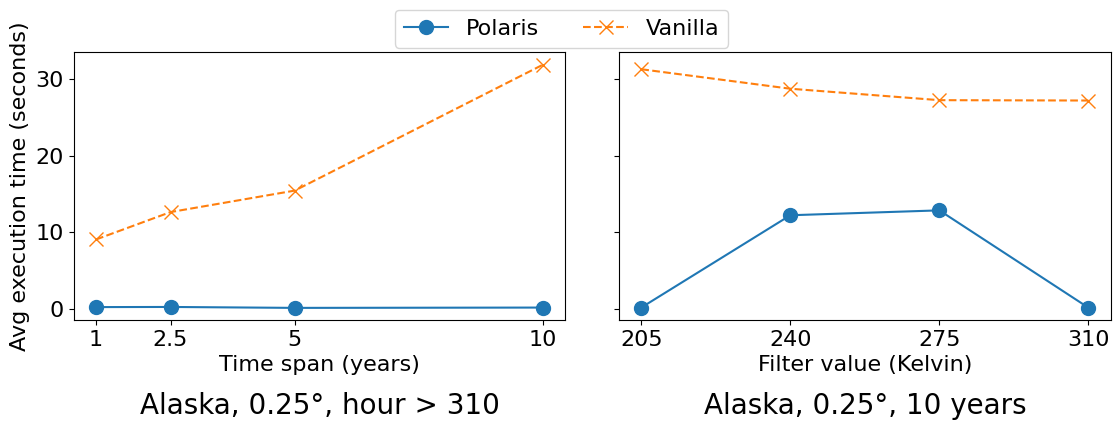

In [104]:
plot_2x2(tdb=False, cld=False, linear=True, df_proposed=df_p_ft, df_vanilla=df_v_ft, df_cloud=None, df_tiledb=None,
         rows=1, cols=2, row_size=5, col_size=12,
         categories=categories_ft, x_labels=xlabels_ft, y_label=ylabel_ft, label_titles=label_025h[:2], 
         title="Find Time Query Performance", title_size=title_fs, subplot_titles=subplot_titles_ft,
         marker_names=marker_025h[:2], marker_size=marker_size, mfill=marker_fill_025h[:2],
         lstyle=lstyle_025h[:2], tick_size=tick_size, tick_list=tick_list_ft, tick_labels=tick_labels_ft,
         outfile="/home/uribe055/experiment-kit/experiment/results/figures/find_time.eps", padding=3.5, subplot_y=-0.3)

# Heatmap

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


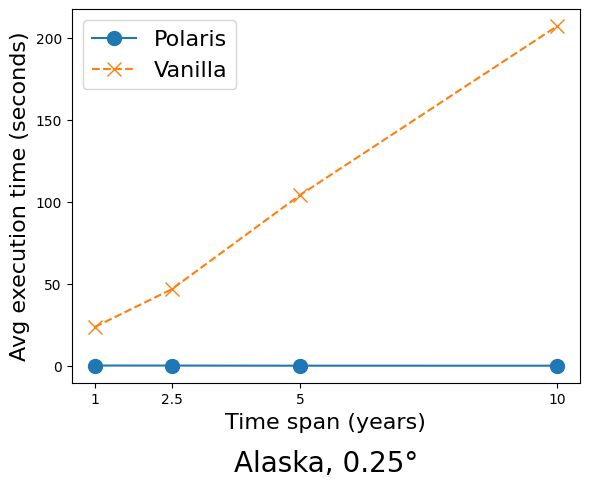

In [105]:
plot_heatmap_results(df_p=df_p_h, df_v=df_v_h, 
                     xlab=xlabel_hm, ylab=ylabel_hm, 
                     tick_list=tick_list_hm, tick_labels=tick_labels_hm,
                     title=title_hm, mfill=marker_fill_1d, 
                     outfile="/home/uribe055/experiment-kit/experiment/results/figures/heatmap.eps")

# 0.25 hourly log scale
**Using reverse run for vanilla temporal resolution**

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


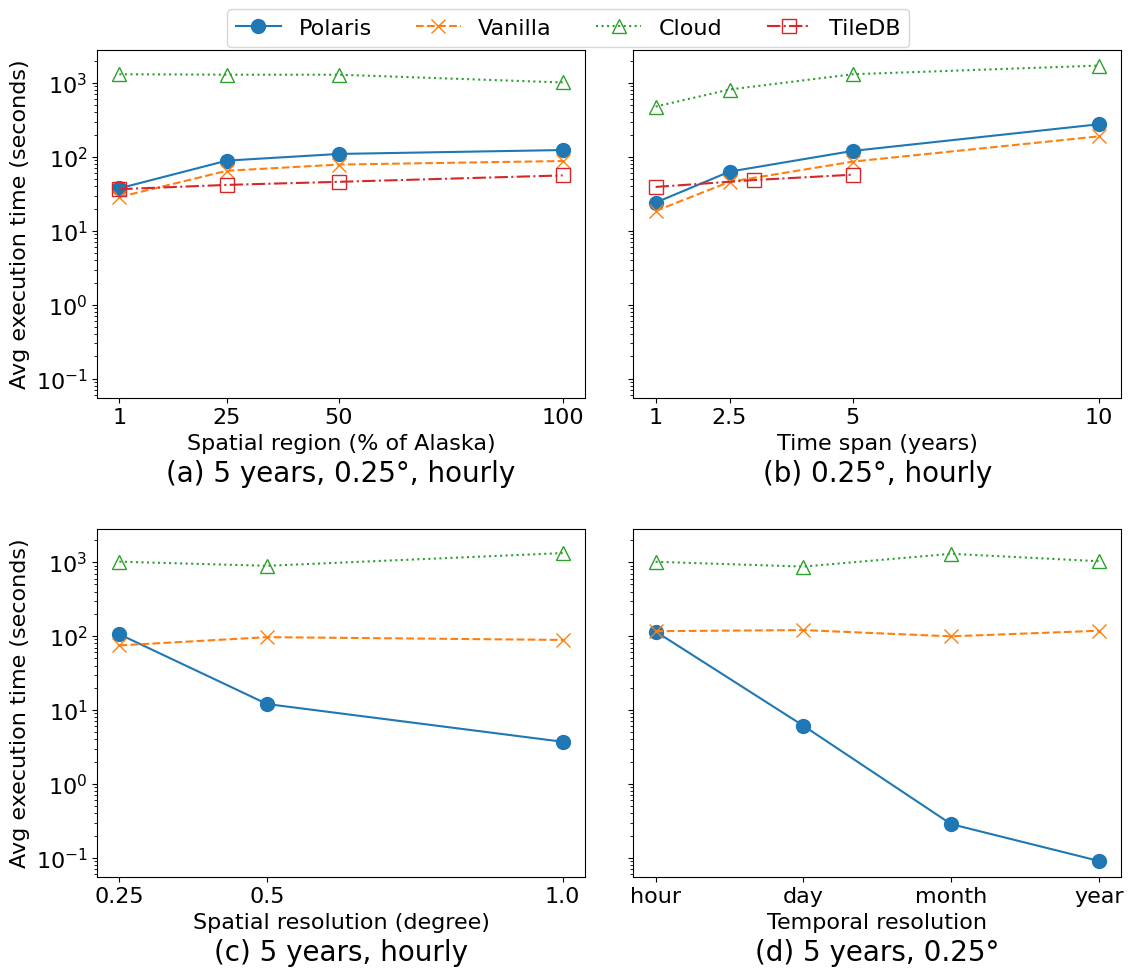

In [106]:
plot_2x2(tdb=True, linear=False, cld=True, rows=2, cols=2, row_size=10, col_size=12,
         df_proposed=df_proposed, df_vanilla=df_vr, df_cloud=df_cloud, df_tiledb=df_tiledb,
         categories=categories, x_labels=x_labels,y_label=ylabel_all, label_titles=label_1d, 
         title=figtitle_1d, title_size=title_fs, subplot_titles=titles_025h_short,
         marker_names=marker_1d, marker_size=marker_size, mfill=marker_fill_1d,
         lstyle=lstyle_1d, tick_size=tick_size, tick_list=tick_list_025h, tick_labels=tick_labels_025h,
         outfile="/home/uribe055/experiment-kit/experiment/results/figures/log_get_raster_025h_tdb.eps")

---
### Linear version with tiledb

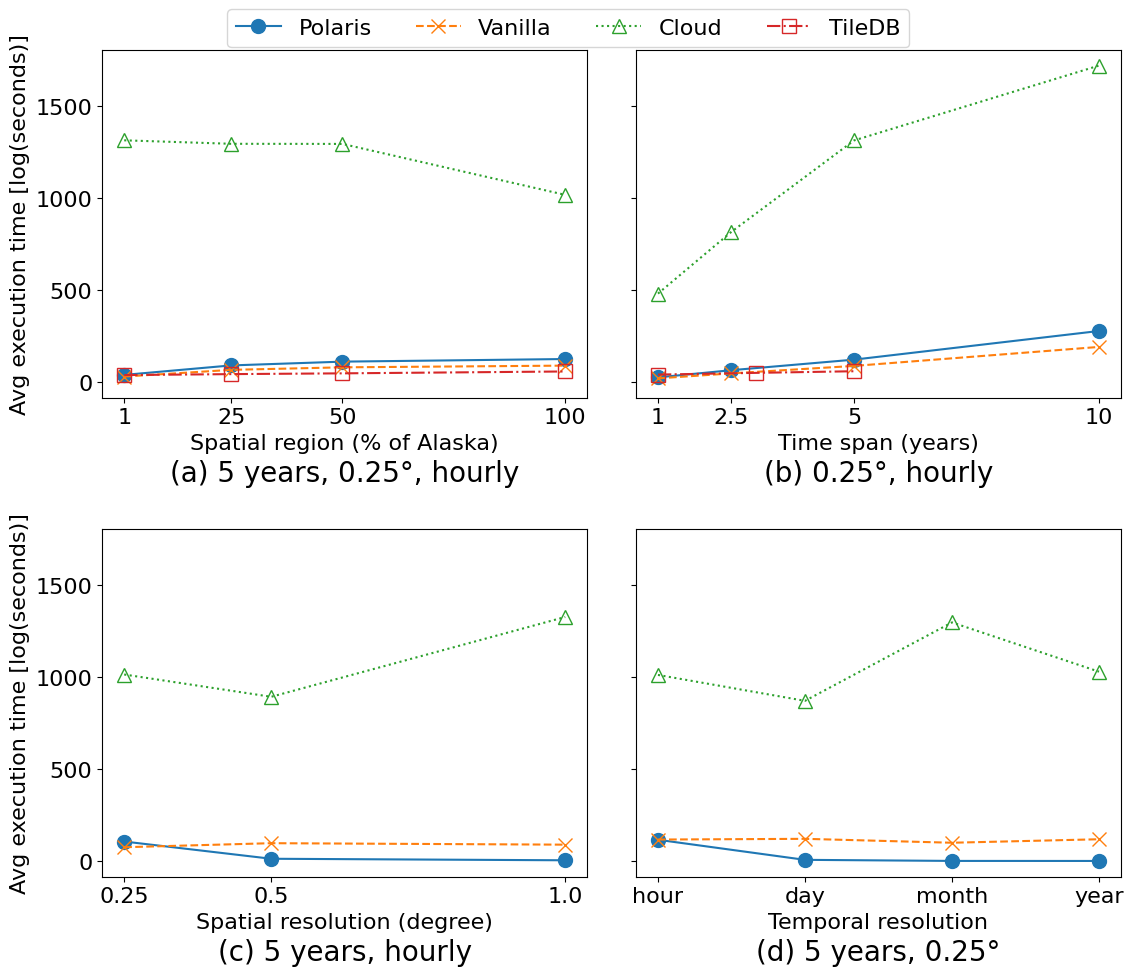

In [21]:
plot_2x2(tdb=True, linear=True, cld=True, rows=2, cols=2, df_proposed=df_proposed, df_vanilla=df_vr, df_cloud=df_cloud, df_tiledb=df_tiledb,
         categories=categories, x_labels=x_labels,y_label=ylabel_all, label_titles=label_1d, 
         title=figtitle_1d, title_size=title_fs, subplot_titles=titles_025h_short,
         marker_names=marker_1d, marker_size=marker_size, mfill=marker_fill_1d,
         lstyle=lstyle_1d, tick_size=tick_size, tick_list=tick_list_025h, tick_labels=tick_labels_025h,
         outfile="/home/uribe055/experiment-kit/experiment/results/figures/linear_get_raster_025h_tdb.pdf")

---
### Log version without tiledb

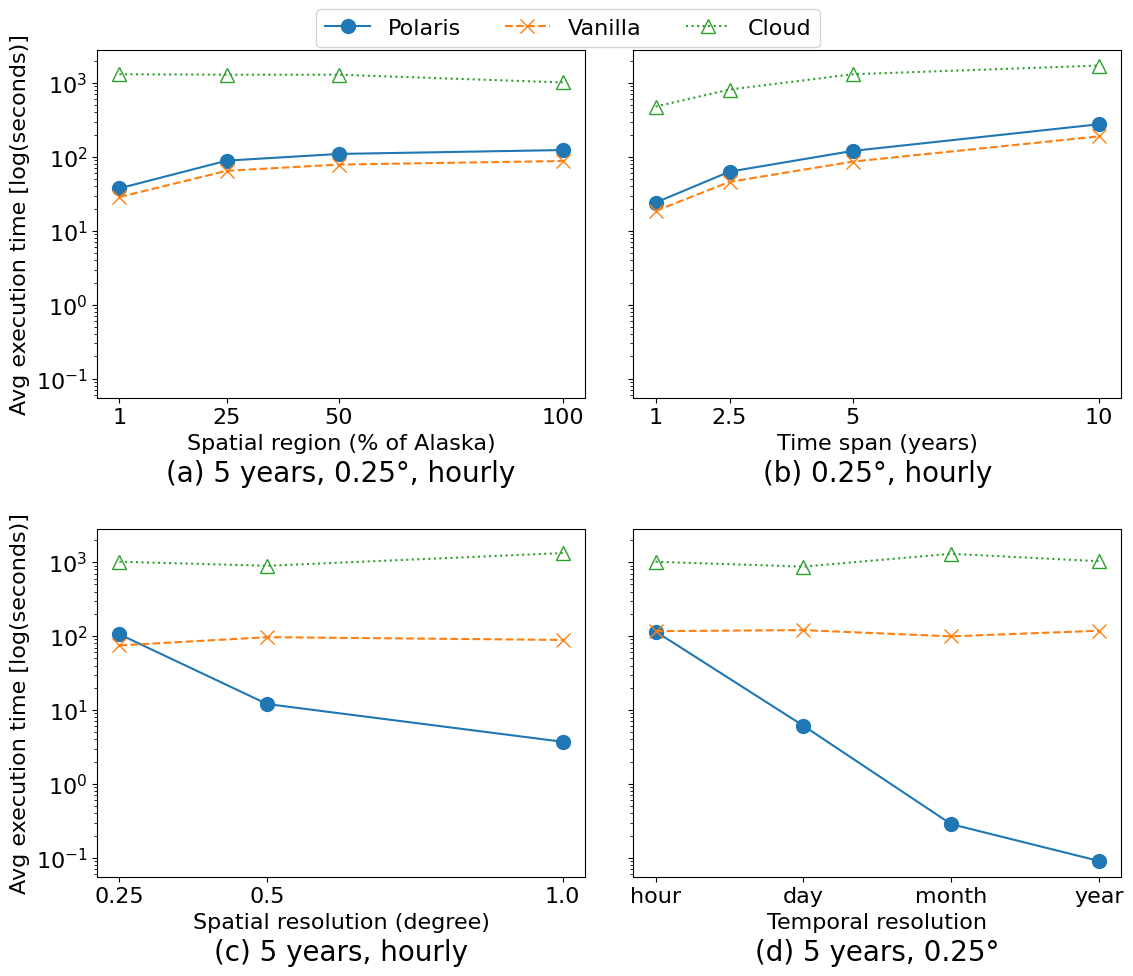

In [17]:
plot_2x2(tdb=False, cld = True, linear=False, df_proposed=df_proposed, df_vanilla=df_vr, df_cloud=df_cloud, df_tiledb=None,
         categories=categories, rows=2, cols=2, x_labels=x_labels, y_label = ylabel_all, label_titles=label_025h, 
         title=figtitle_025h, title_size=title_fs, subplot_titles=titles_025h_short,
         marker_names=marker_025h, marker_size=marker_size, mfill=marker_fill_025h,
         lstyle=lstyle_025h, tick_size=tick_size, tick_list=tick_list_025h, tick_labels=tick_labels_025h,
         outfile="/home/uribe055/experiment-kit/experiment/results/figures/log_get_raster_025h.pdf")

---
### Linear version without tiledb

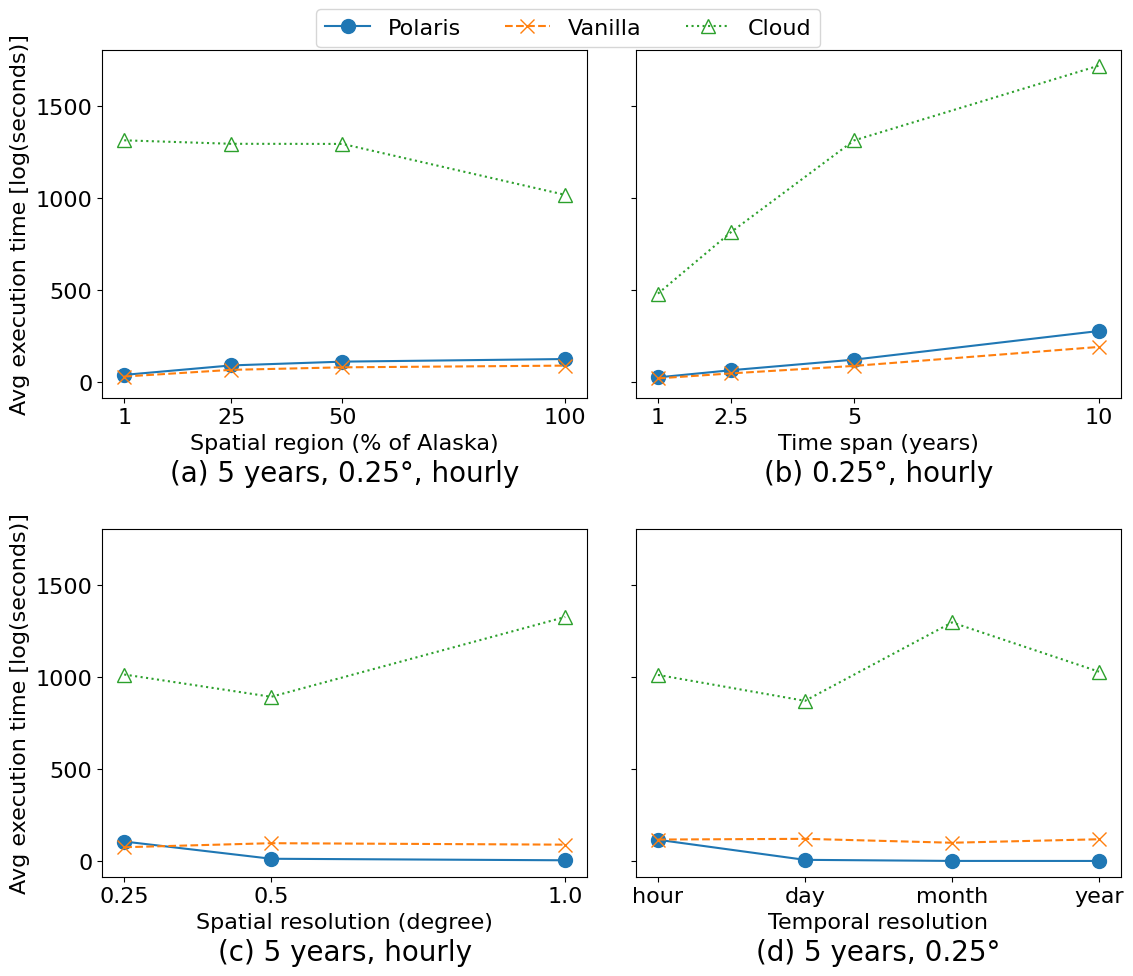

In [19]:
plot_2x2(tdb=False, linear=True, cld=True, rows=2, cols=2, df_proposed=df_proposed, df_vanilla=df_vr, df_cloud=df_cloud, df_tiledb=None,
         categories=categories, x_labels=x_labels, y_label=ylabel_all, label_titles=label_025h, 
         title=figtitle_025h, title_size=title_fs, subplot_titles=titles_025h_short,
         marker_names=marker_025h, marker_size=marker_size, mfill=marker_fill_025h,
         lstyle=lstyle_025h, tick_size=tick_size, tick_list=tick_list_025h, tick_labels=tick_labels_025h,
         outfile="/home/uribe055/experiment-kit/experiment/results/figures/linear_get_raster_025h.pdf")

# 1.0 degree daily log scale

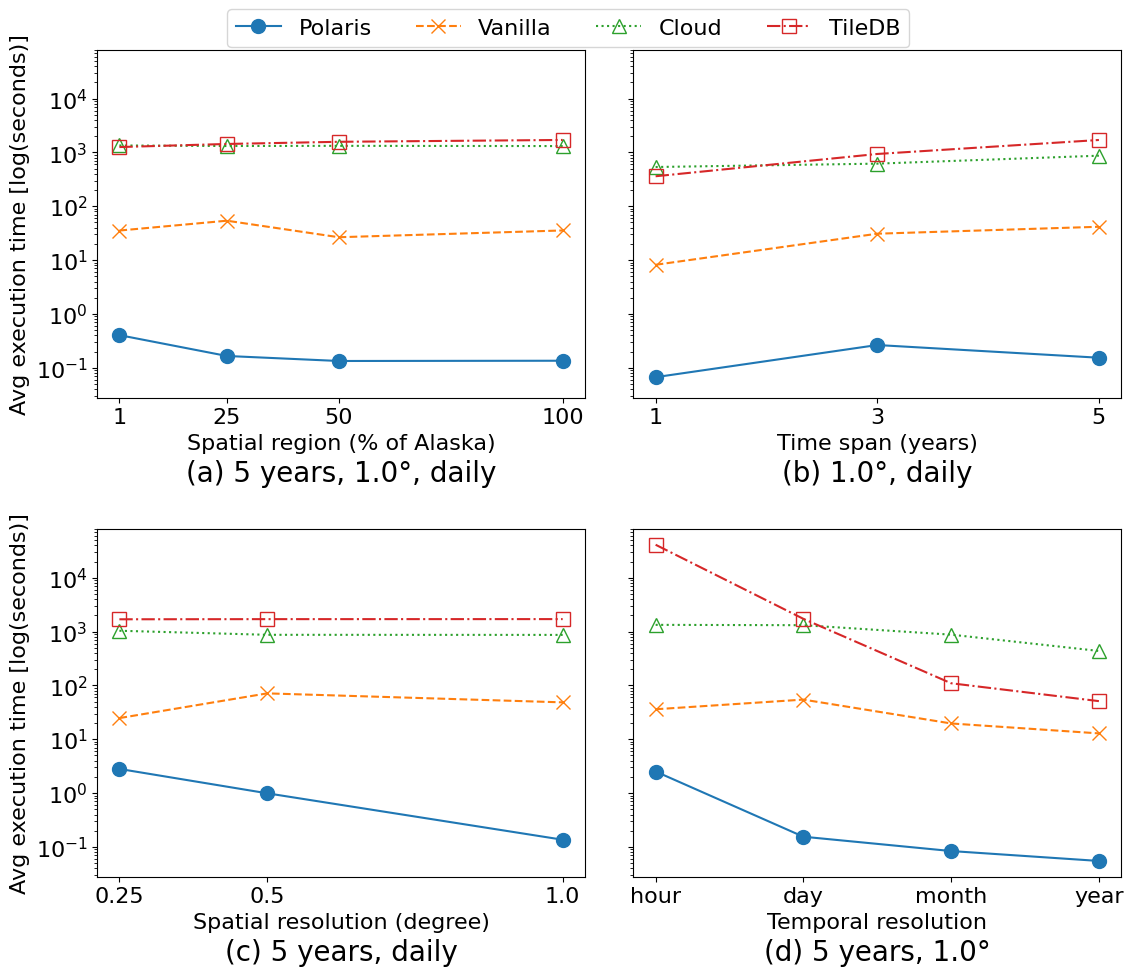

In [166]:
plot_2x2(tdb=True, linear=False, df_proposed=df_proposed_1d, df_vanilla=df_vanilla_1d, df_cloud=df_cloud_1d, df_tiledb=df_tiledb_1d,
         categories=categories, x_labels=x_labels, label_titles=label_1d, 
         title=figtitle_1d, title_size=title_fs, subplot_titles=titles_1d_short,
         marker_names=marker_1d, marker_size=marker_size, mfill=marker_fill_1d,
         lstyle=lstyle_1d, tick_size=tick_size, tick_list=tick_list_1d, tick_labels=tick_labels_1d,
         outfile="/home/uribe055/experiment-kit/experiment/results/figures/log_get_raster_1d.pdf")

---
### Linear version

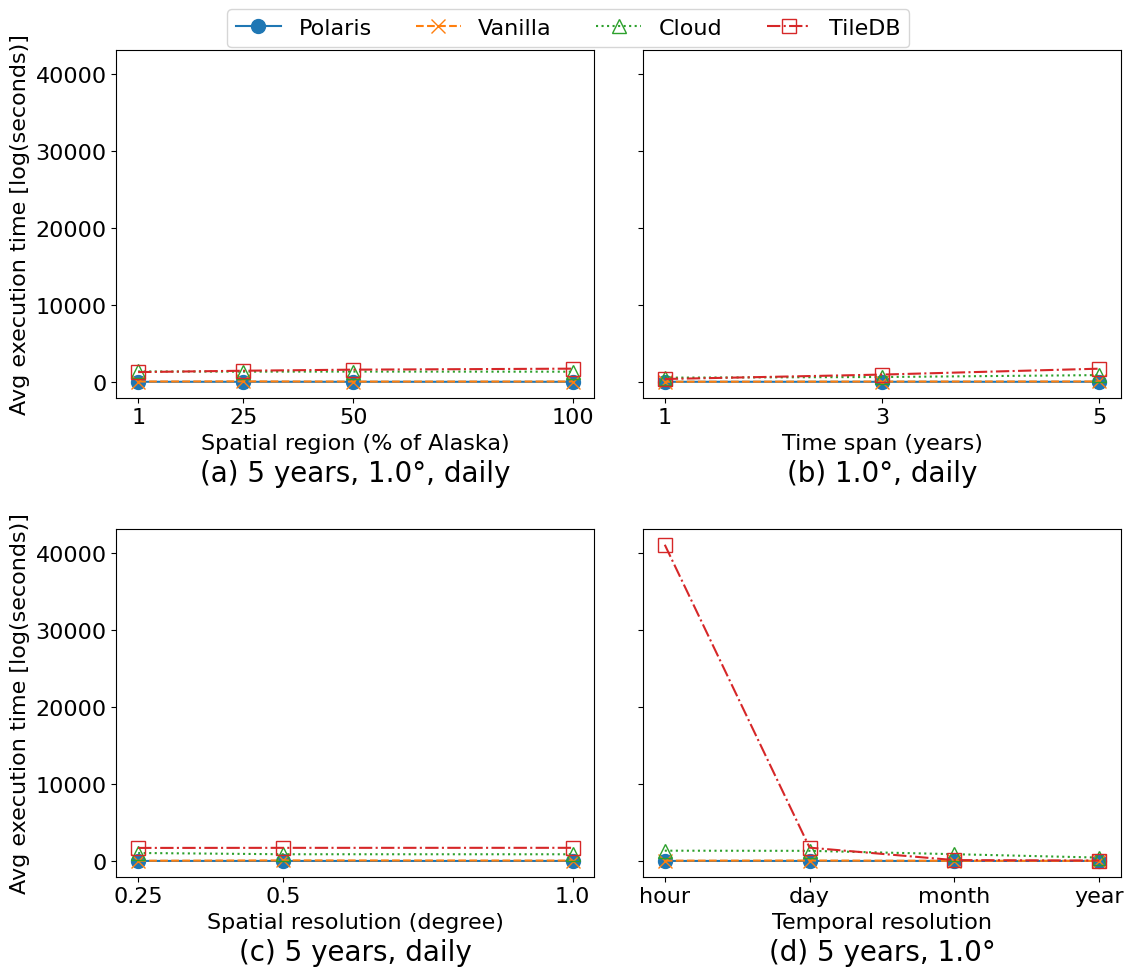

In [167]:
plot_2x2(tdb=True, linear=True, df_proposed=df_proposed_1d, df_vanilla=df_vanilla_1d, df_cloud=df_cloud_1d, df_tiledb=df_tiledb_1d,
         categories=categories, x_labels=x_labels, label_titles=label_1d, 
         title=figtitle_1d, title_size=title_fs, subplot_titles=titles_1d_short,
         marker_names=marker_1d, marker_size=marker_size, mfill=marker_fill_1d,
         lstyle=lstyle_1d, tick_size=tick_size, tick_list=tick_list_1d, tick_labels=tick_labels_1d,
         outfile="/home/uribe055/experiment-kit/experiment/results/figures/linear_get_raster_1d.pdf")